In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from pylab import rcParams

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

##### Importación de datos + EDA

In [4]:
df_lunr = pd.read_csv('LUNR.csv')
df_rklb = pd.read_csv('RKLB.csv')

In [5]:
df_lunr.head()

Date Close/Last    Volume    Open     High      Low
0  01/03/2025     $21.89  22211240  $19.45   $22.12   $19.16
1  01/02/2025     $19.32  27752500  $18.31  $21.005  $17.712
2  12/31/2024     $18.16  14048230  $18.94   $19.21   $17.55
3  12/30/2024     $18.94  15412770  $17.75   $19.30   $17.27
4  12/27/2024     $18.39  15166170  $19.09   $19.62   $17.87

In [6]:
df_rklb.head()

Date Close/Last    Volume     Open    High      Low
0  01/03/2025     $28.74  22114680  $25.025  $28.77  $25.025
1  01/02/2025     $24.96  13792670   $25.43  $25.66   $23.70
2  12/31/2024     $25.47  13084830   $26.54  $26.88   $25.18
3  12/30/2024     $26.32  13775610   $26.22  $26.81   $24.90
4  12/27/2024     $27.22  15559150   $28.21  $28.71   $26.74

In [7]:
df_lunr.shape

(465, 6)

In [8]:
df_rklb.shape

(465, 6)

In [9]:
df_lunr[df_lunr==0].count() / df_lunr.count()

Date         0.00
Close/Last   0.00
Volume       0.00
Open         0.00
High         0.00
Low          0.00
dtype: float64

In [10]:
df_rklb[df_rklb==0].count() / df_rklb.count()

Date         0.00
Close/Last   0.00
Volume       0.00
Open         0.00
High         0.00
Low          0.00
dtype: float64

##### Limpieza de datos, visualización básica, inclusión de timestamps

In [11]:
def nasdaq_clean(dataframe):

    dataframe = dataframe.rename(columns={'Close/Last':'Close'})

    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    
    for c in ['Close','Open','High','Low']:
        dataframe[c] = dataframe[c].str.replace('$','')
        dataframe[c] = dataframe[c].astype('float')

    dataframe.insert(0,'Volume',dataframe.pop('Volume'))

    dataframe = dataframe.set_index('Date')
    dataframe = dataframe.sort_index()

    return dataframe

In [12]:
df_lunr = nasdaq_clean(df_lunr)
df_rklb = nasdaq_clean(df_rklb)

In [13]:
df_lunr.describe().T

count       mean         std      min       25%        50%        75%  \
Volume 465.00 6129397.23 13249582.11 61472.00 346603.00 1474882.00 6708293.00   
Close  465.00       6.66        3.55     2.11      3.90       5.51       8.36   
Open   465.00       6.69        3.54     2.16      3.90       5.51       8.42   
High   465.00       7.08        3.88     2.34      4.02       5.85       8.74   
Low    465.00       6.34        3.29     2.09      3.77       5.23       8.02   

                max  
Volume 141864600.00  
Close         21.89  
Open          19.72  
High          22.12  
Low           19.16

In [14]:
df_rklb.describe().T

count       mean         std        min        25%        50%  \
Volume 465.00 8775527.26 10136316.36 1657071.00 3415962.00 5456604.00   
Close  465.00       6.79        5.27       3.53       4.27       4.83   
Open   465.00       6.76        5.21       3.51       4.28       4.81   
High   465.00       7.01        5.51       3.61       4.38       4.94   
Low    465.00       6.55        4.96       3.47       4.18       4.67   

               75%          max  
Volume 10111760.00 121001300.00  
Close         6.27        28.74  
Open          6.26        28.21  
High          6.45        28.80  
Low           6.11        26.74

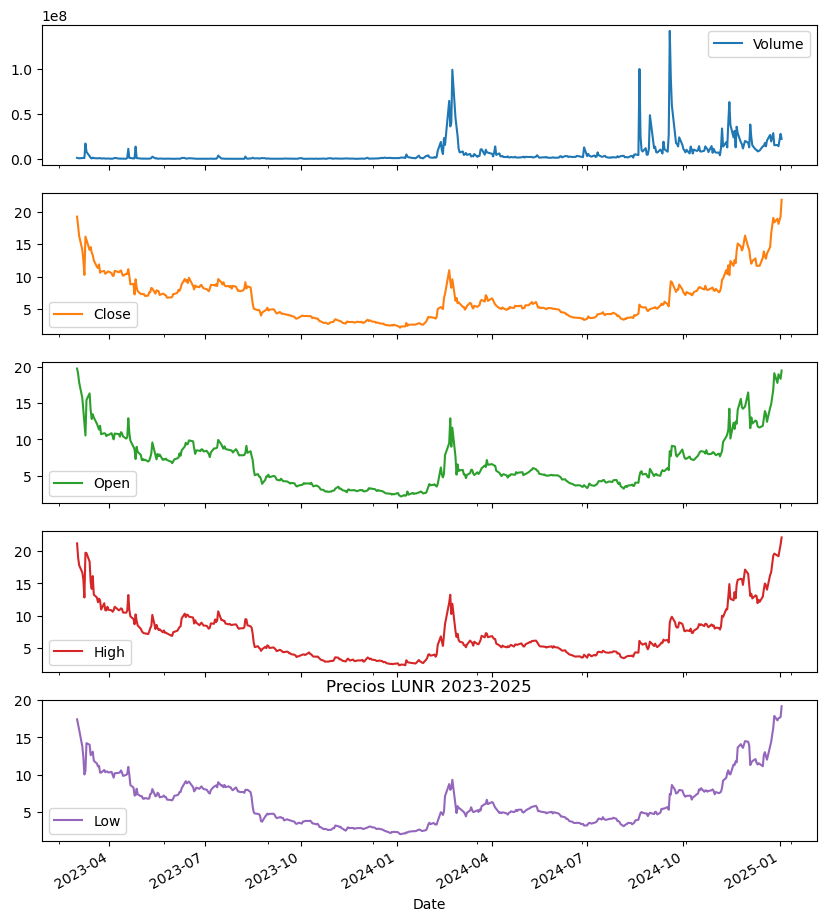

In [15]:
df_lunr.plot(subplots=True, figsize=(10,12))
plt.title('Precios LUNR 2023-2025')
plt.show()

##### Rangos de datos, shifting y lags, resampling

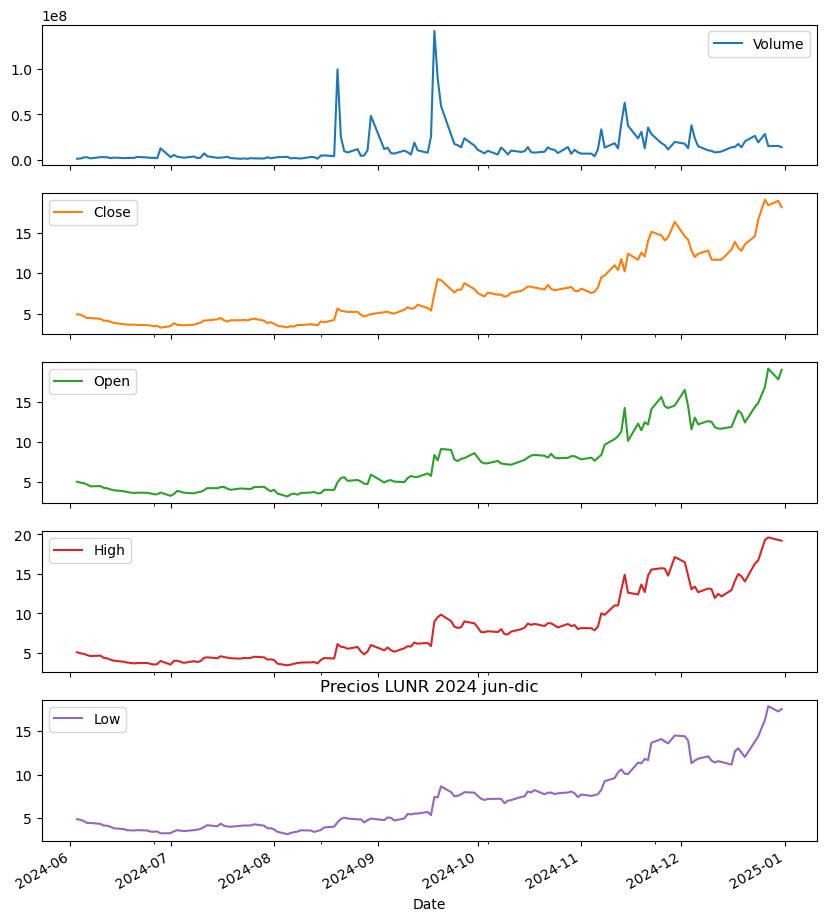

In [16]:
df_lunr['2024-06':'2024-12'].plot(subplots=True, figsize=(10,12))
plt.title('Precios LUNR 2024 jun-dic')
plt.show()

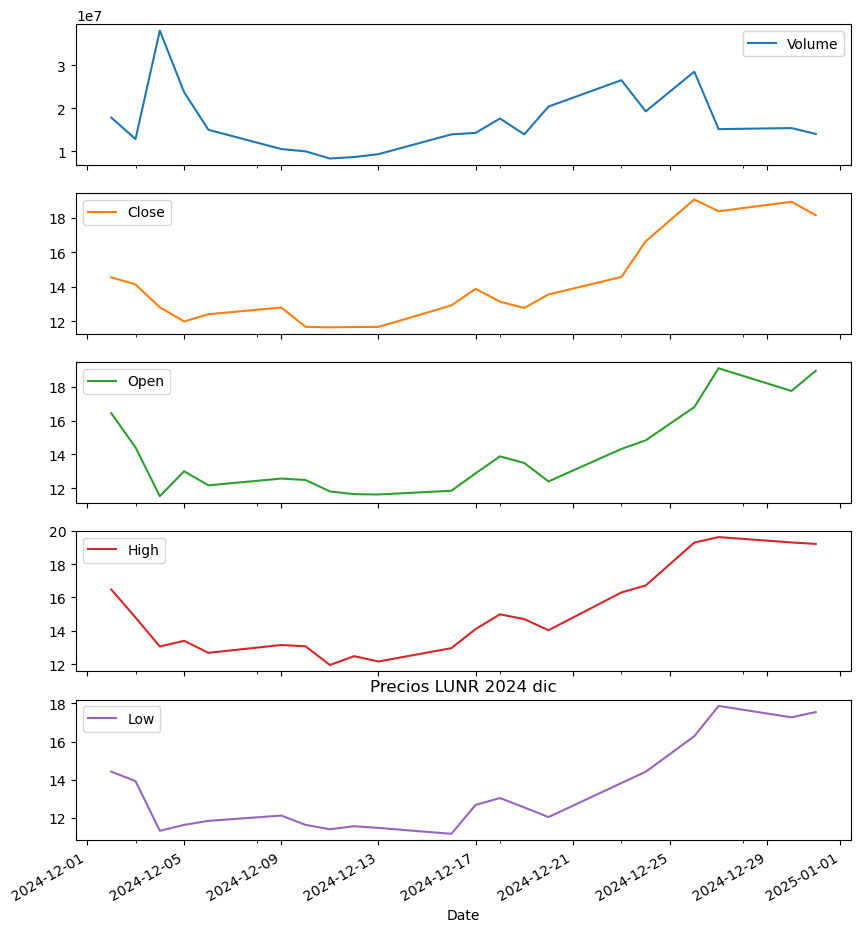

In [17]:
df_lunr['2024-12-01':'2024-12-31'].plot(subplots=True, figsize=(10,12))
plt.title('Precios LUNR 2024 dic')
plt.show()

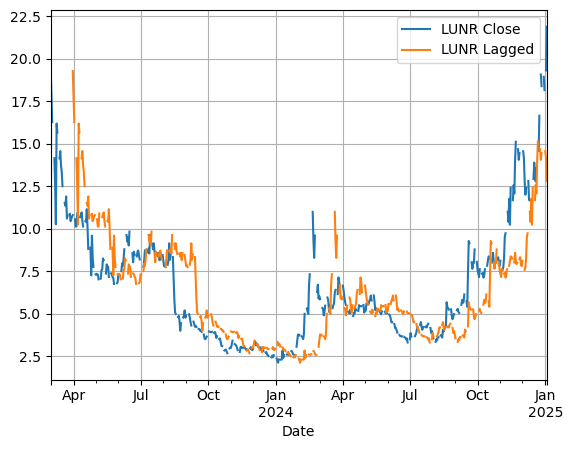

In [18]:
df_lunr['Close'].asfreq('D').plot()
lag = 30
shifted = df_lunr['Close'].asfreq('D').shift(lag).plot()
shifted.legend(['LUNR Close','LUNR Lagged'])
plt.grid()
plt.show()

##### Visualización de % cambios y retornos

In [19]:
df_lunr['Change'] = df_lunr['Close'].div(df_lunr['Close'].shift())

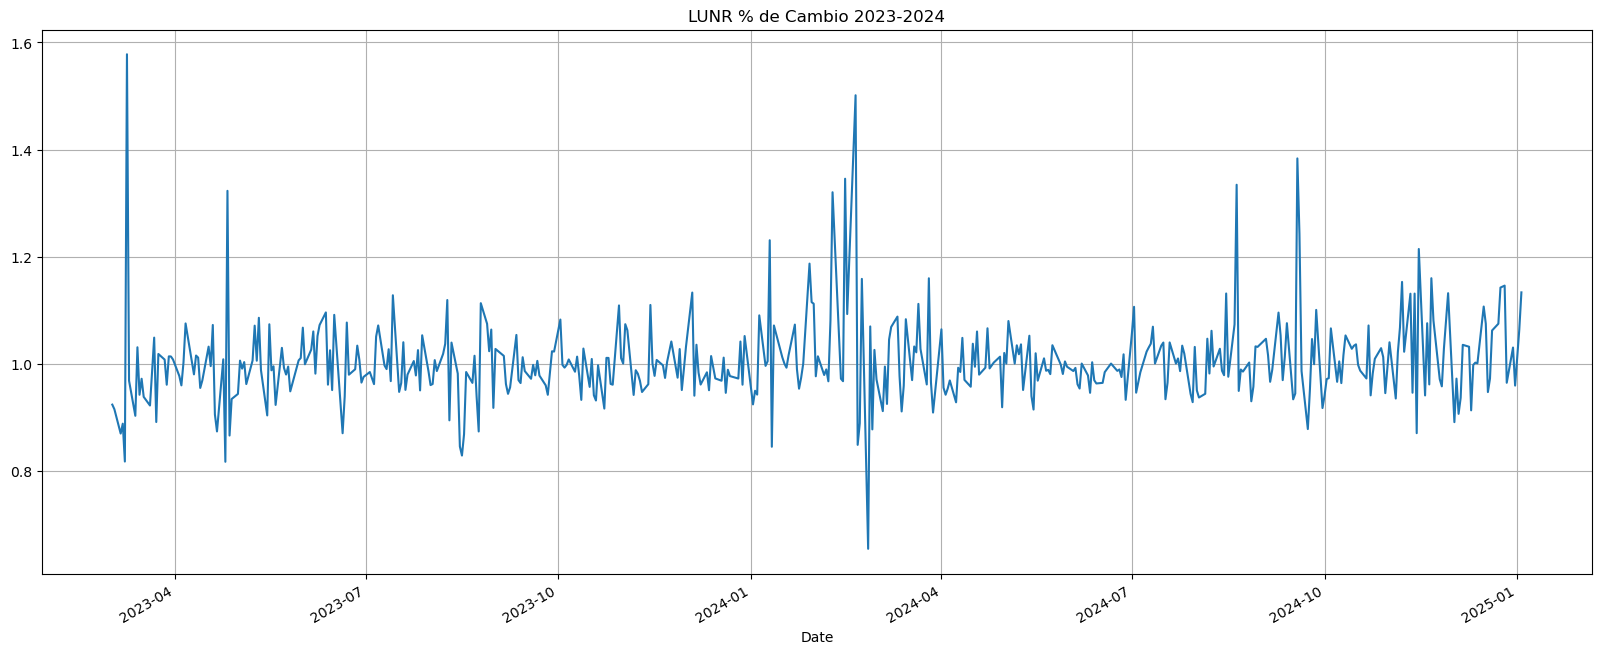

In [20]:
df_lunr['Change'].plot(figsize=(20,8)).grid()
plt.title('LUNR % de Cambio 2023-2024')
plt.show()

In [21]:
df_lunr['Return'] = df_lunr['Change'].sub(1).mul(100)

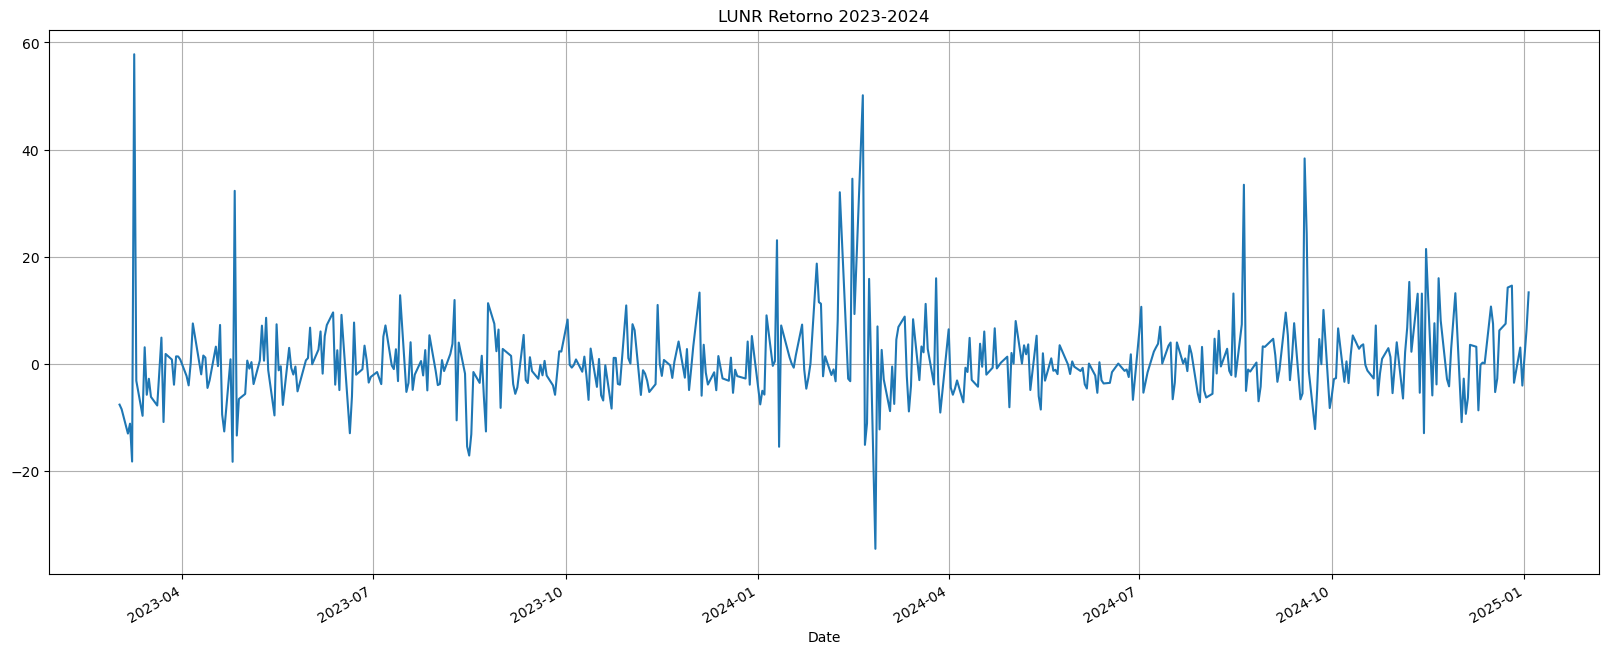

In [22]:
df_lunr['Return'].plot(figsize=(20,8)).grid()
plt.title('LUNR Retorno 2023-2024')
plt.show()

##### Técnicas de comparación de series

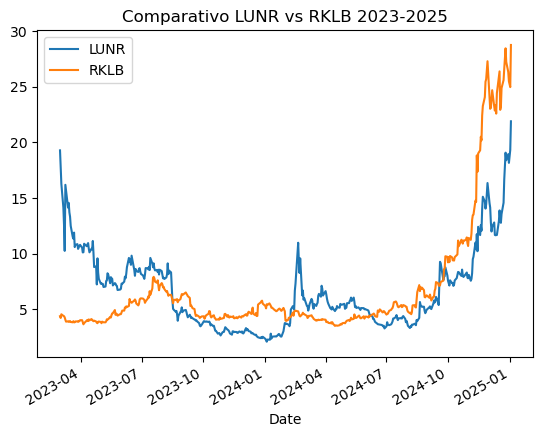

In [23]:
# Visualización sin normalizar los datos
df_lunr['Close'].plot()
df_rklb['Close'].plot()
plt.legend(['LUNR','RKLB'])
plt.title('Comparativo LUNR vs RKLB 2023-2025')
plt.show()

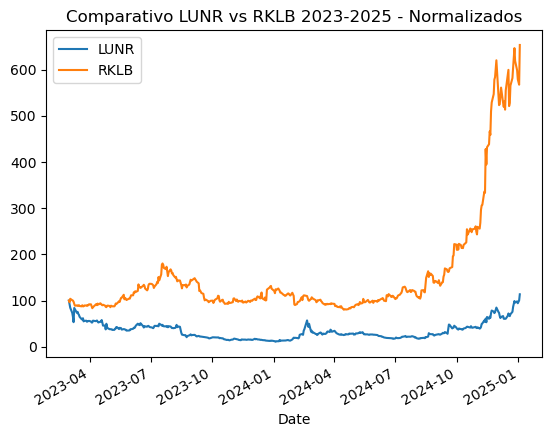

In [24]:
# Visualización normalizando los datos
normal_lunr = df_lunr['Close'].div(df_lunr['Close'].iloc[0]).mul(100)
normal_rklb = df_rklb['Close'].div(df_rklb['Close'].iloc[0]).mul(100)
normal_lunr.plot()
normal_rklb.plot()
plt.legend(['LUNR','RKLB'])
plt.title('Comparativo LUNR vs RKLB 2023-2025 - Normalizados')
plt.show()

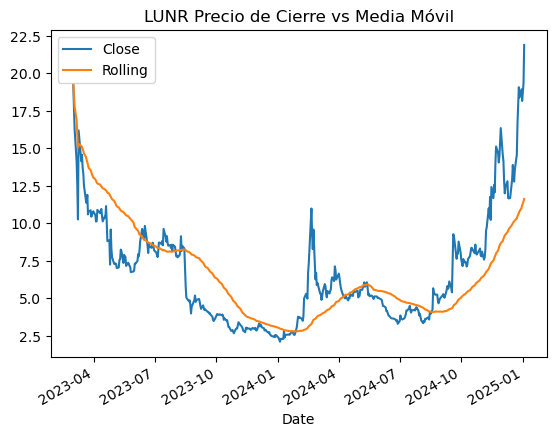

In [25]:
# LUNR precios de cierre vs media móvil
rolling_lunr = df_lunr['Close'].rolling('90D').mean()
df_lunr['Close'].plot()
rolling_lunr.plot()
plt.title('LUNR Precio de Cierre vs Media Móvil')
plt.legend(['Close','Rolling'])
plt.show()

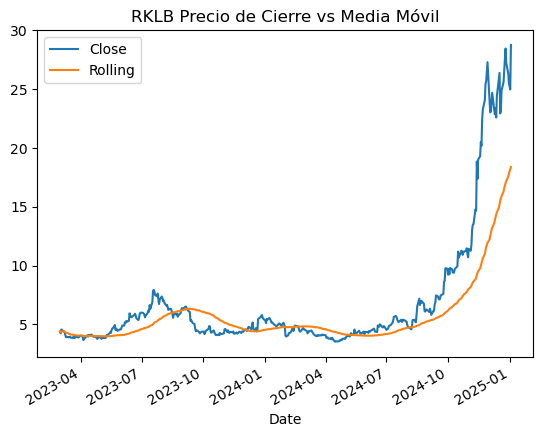

In [26]:
# RKLB precios de cierre vs media móvil
rolling_rklb = df_rklb['Close'].rolling('90D').mean()
df_rklb['Close'].plot()
rolling_rklb.plot()
plt.title('RKLB Precio de Cierre vs Media Móvil')
plt.legend(['Close','Rolling'])
plt.show()

##### Gráficos OHLC y Candlesticks

In [27]:
ohlc_lunr = go.Ohlc(
    x=df_lunr['2024-12-01':'2024-12-31'].index,
    open=df_lunr['2024-12-01':'2024-12-31']['Open'],
    high=df_lunr['2024-12-01':'2024-12-31']['High'],
    low=df_lunr['2024-12-01':'2024-12-31']['Low'],
    close=df_lunr['2024-12-01':'2024-12-31']['Close'])

iplot([ohlc_lunr])

In [28]:
ohlc_rklb = go.Ohlc(
    x=df_rklb['2024-12-01':'2024-12-31'].index,
    open=df_rklb['2024-12-01':'2024-12-31']['Open'],
    high=df_rklb['2024-12-01':'2024-12-31']['High'],
    low=df_rklb['2024-12-01':'2024-12-31']['Low'],
    close=df_rklb['2024-12-01':'2024-12-31']['Close'])

iplot([ohlc_rklb])

In [29]:
candles_lunr = go.Candlestick(
    x=df_lunr['2024-12-01':'2024-12-31'].index,
    open=df_lunr['2024-12-01':'2024-12-31']['Open'],
    high=df_lunr['2024-12-01':'2024-12-31']['High'],
    low=df_lunr['2024-12-01':'2024-12-31']['Low'],
    close=df_lunr['2024-12-01':'2024-12-31']['Close'])

iplot([candles_lunr])

In [30]:
candles_rklb = go.Candlestick(
    x=df_rklb['2024-12-01':'2024-12-31'].index,
    open=df_rklb['2024-12-01':'2024-12-31']['Open'],
    high=df_rklb['2024-12-01':'2024-12-31']['High'],
    low=df_rklb['2024-12-01':'2024-12-31']['Low'],
    close=df_rklb['2024-12-01':'2024-12-31']['Close'])

iplot([candles_rklb])

##### Descomposición de series de tiempo

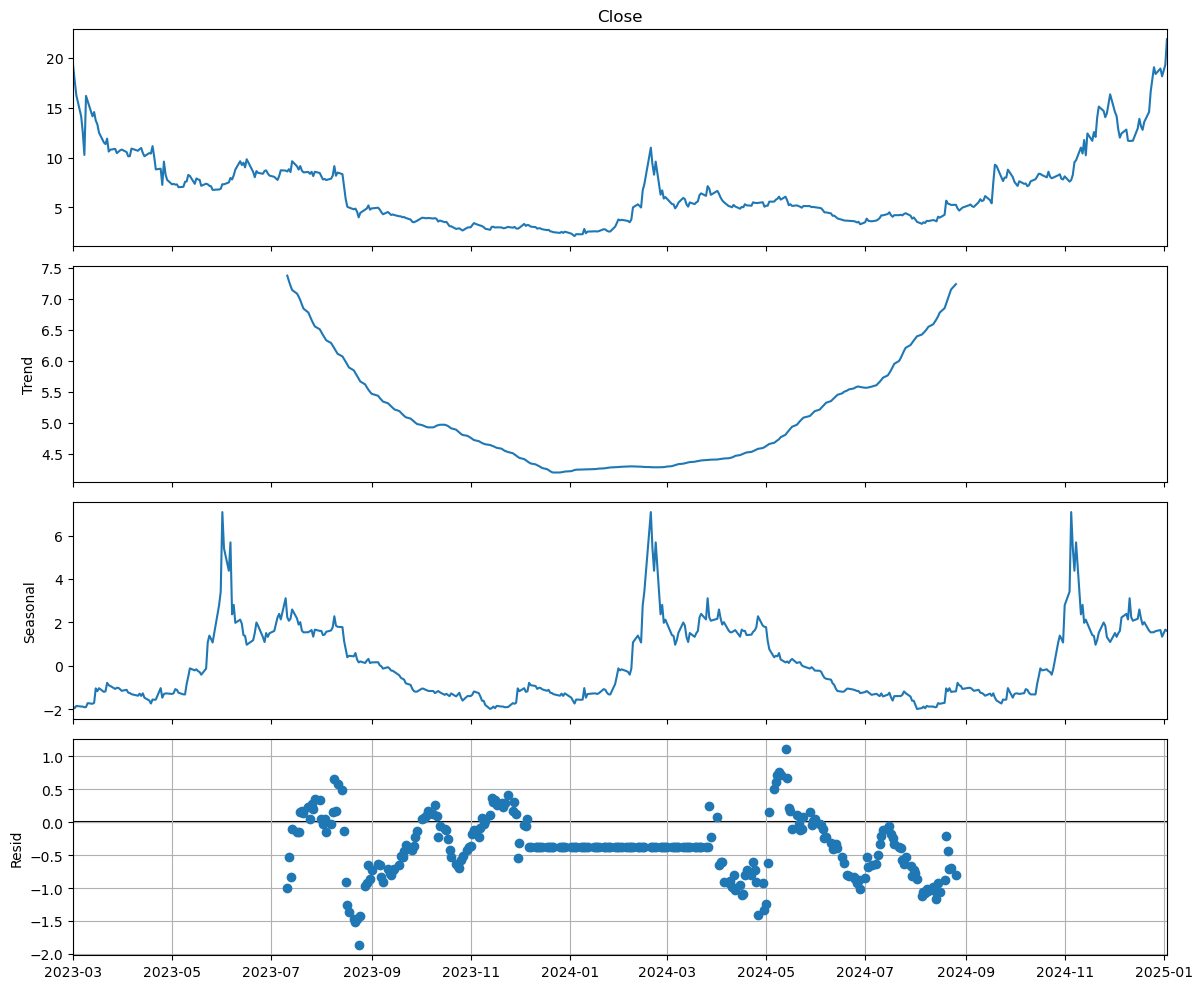

In [31]:
rcParams['figure.figsize'] = 12,10

decomposed_lunr = sm.tsa.seasonal_decompose(df_lunr['Close'],period=180)

decomposed_lunr.plot()
plt.grid()
plt.show()

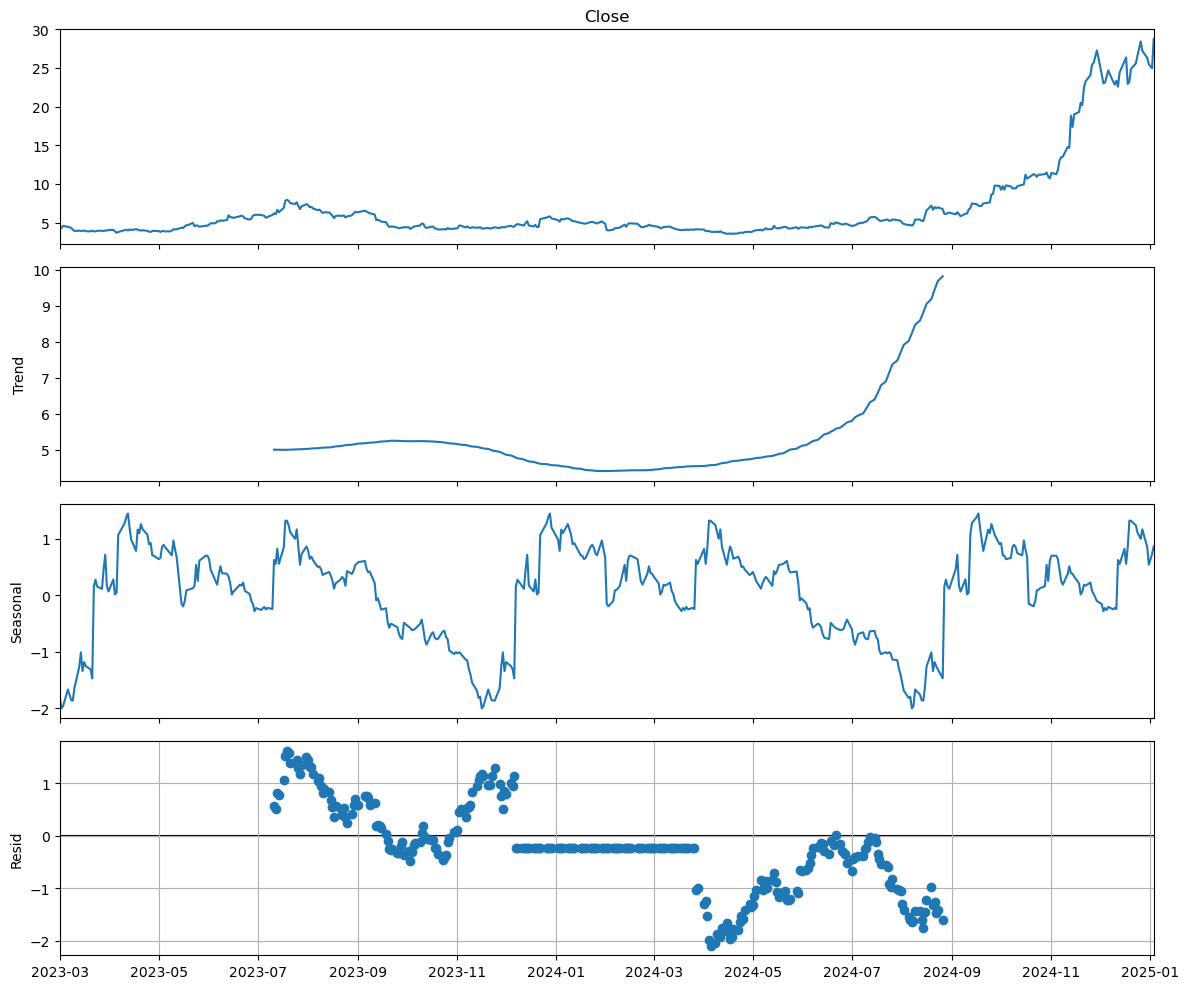

In [32]:
rcParams['figure.figsize'] = 12,10

decomposed_rklb = sm.tsa.seasonal_decompose(df_rklb['Close'],period=180)

decomposed_rklb.plot()
plt.grid()
plt.show()